# Import All Needed Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
import random
import statistics as st
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import statsmodels.api as sm

# Load Data From CSV File as DataFrame 

In [2]:
data=pd.read_csv("bmi.csv")

# First Few Rows Of The Datsset

In [3]:
data

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2
...,...,...,...,...,...
736,34,1.86,95.70,27.662157,Overweight
737,44,1.91,106.90,29.302925,Overweight
738,25,1.82,88.40,26.687598,Overweight
739,35,1.88,98.50,27.868945,Overweight


# Summary Of Dataset

In [4]:
data.shape

(741, 5)

In [5]:
data.describe()

,Age,Height,Weight,Bmi
count,741.000000,741.000000,741.000000,741.000000
mean,31.618084,1.709427,78.412497,26.365427
std,11.655466,0.085974,32.254547,9.223191
min,15.000000,1.460000,25.900000,12.150497
25%,22.000000,1.670000,63.000000,22.129740
50%,29.000000,1.721000,72.900000,24.132412
75%,40.000000,1.751000,83.300000,27.249306
max,61.000000,2.070000,270.000000,66.301350


# Initial Insights Of Dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       741 non-null    int64  
 1   Height    741 non-null    float64
 2   Weight    741 non-null    float64
 3   Bmi       741 non-null    float64
 4   BmiClass  741 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 29.1+ KB


# Handling Missing Values

In [7]:
data.isnull().sum()

Age         0
Height      0
Weight      0
Bmi         0
BmiClass    0
dtype: int64

In [8]:
data['BmiClass'].value_counts()

BmiClass
Normal Weight    342
Overweight       166
Underweight       96
Obese Class 3     62
Obese Class 2     55
Obese Class 1     20
Name: count, dtype: int64

In [9]:
data['BmiClass'].unique()

array(['Obese Class 1', 'Overweight', 'Underweight', 'Obese Class 2',
       'Obese Class 3', 'Normal Weight'], dtype=object)

**Dataset Splitting And Store It As A New DataFrame For Furthur Need In Programming**

In [10]:
data_Obese_1=data[data['BmiClass']=="Obese Class 1"]
data_Obese_2=data[data['BmiClass']=="Obese Class 2"]
data_Obese_3=data[data['BmiClass']=="Obese Class 3"]
data_Underweight=data[data['BmiClass']=="Underweight"]
data_Overweight=data[data['BmiClass']=="Overweight"]

# Data Visualization

<Axes: xlabel='BmiClass', ylabel='count'>

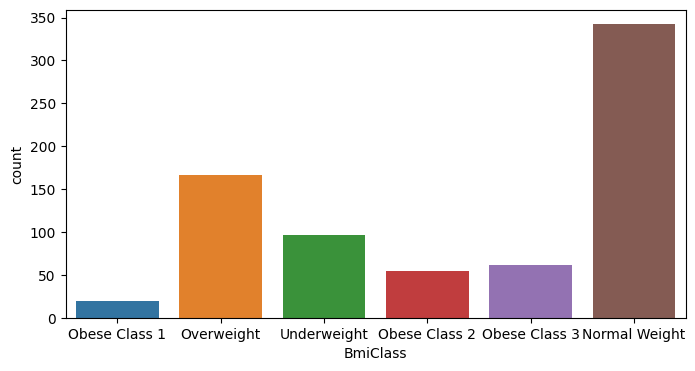

In [11]:
plt.figure(figsize = (8,4))
sns.countplot(x="BmiClass", data=data)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


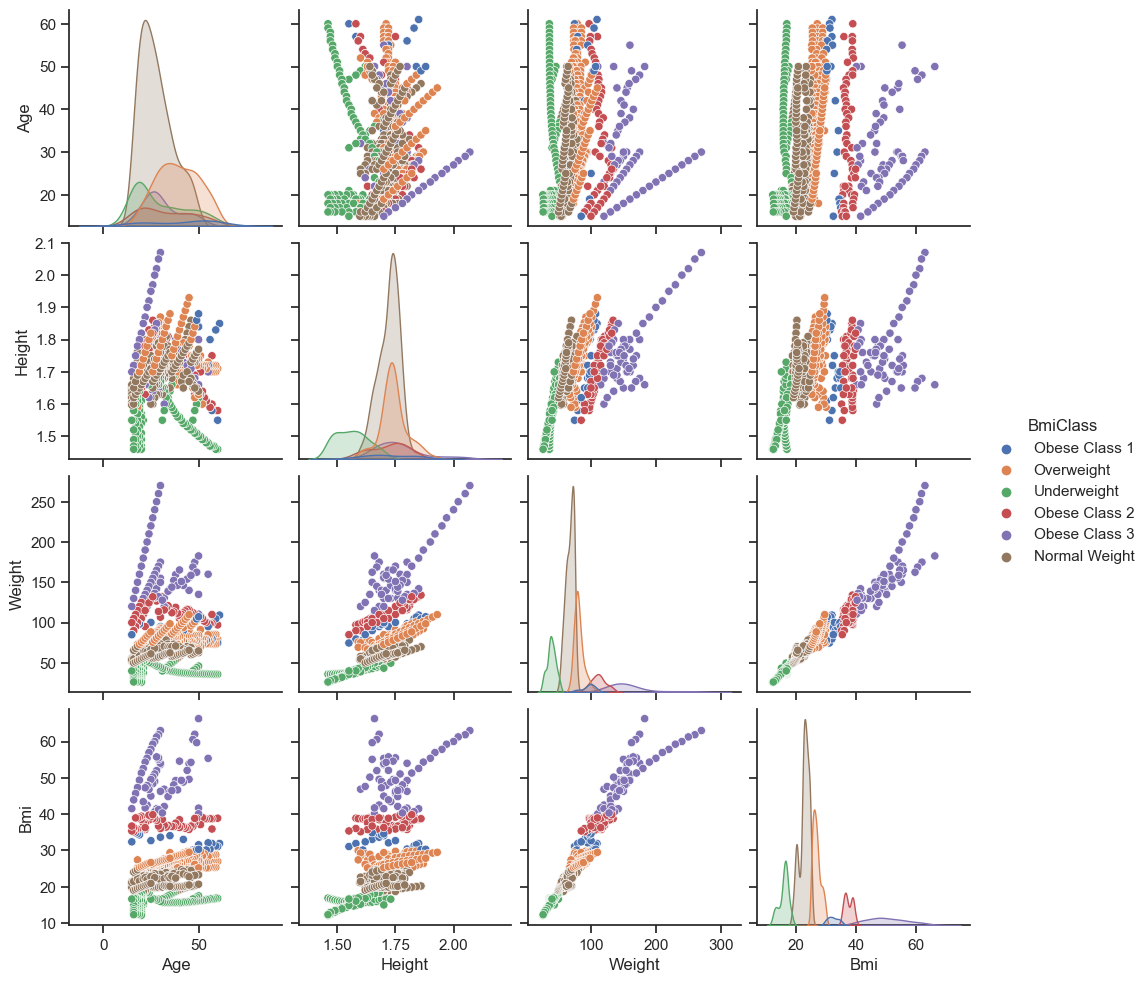

In [12]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data.iloc[:,0:5],hue='BmiClass')

In [13]:
# features = ['Age', 'Height', 'Weight', 'Bmi']
# plt.subplots(figsize=(20,10))
# for i, col in enumerate(features):
#     plt.subplot(2,3,i+1)
#     plt.title(col)
#     sns.boxplot(data[col])
# plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

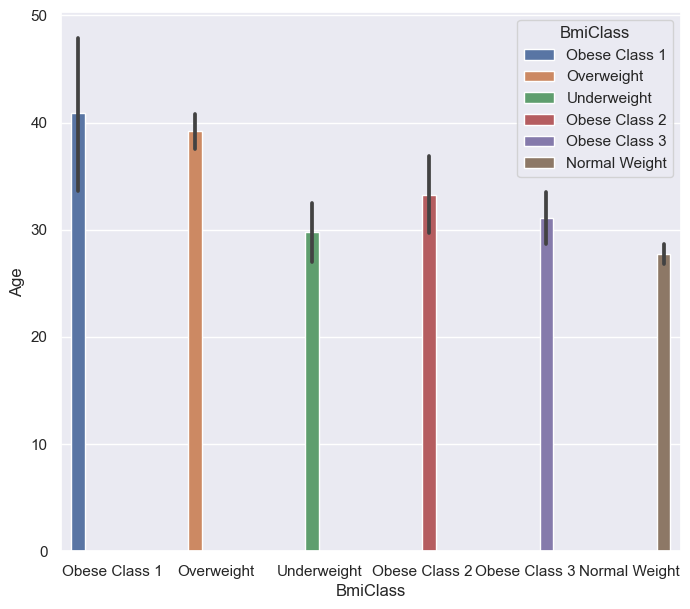

In [14]:
sns.set(rc={'figure.figsize':(8,7)})
sns.barplot(x='BmiClass',y='Age',data=data,hue='BmiClass')
plt.show

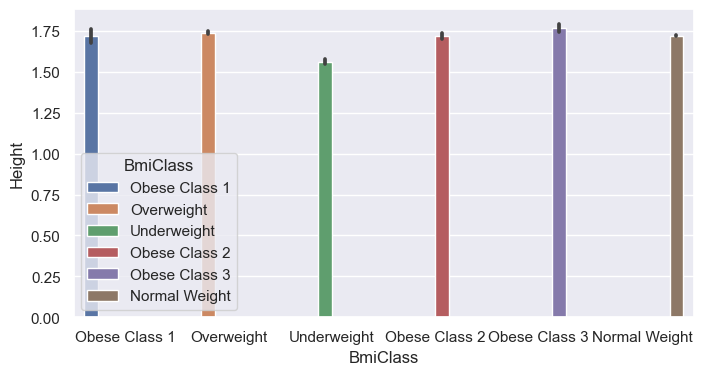

In [15]:
sns.set(rc={'figure.figsize':(8,4)})
sns.barplot(x='BmiClass',y='Height',data=data,hue='BmiClass')
plt.show()

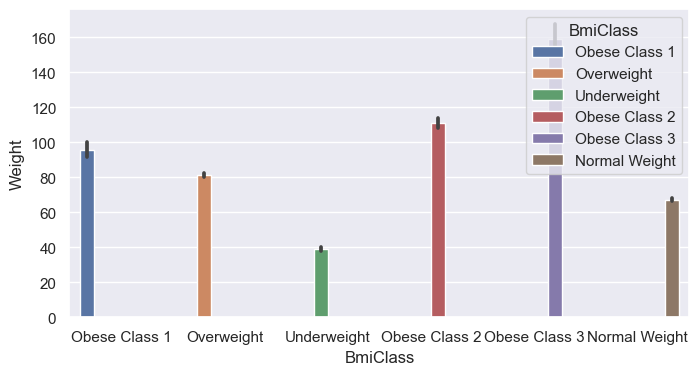

In [16]:
sns.set(rc={'figure.figsize':(8,4)})
sns.barplot(x='BmiClass',y='Weight',data=data,hue='BmiClass')
plt.show()

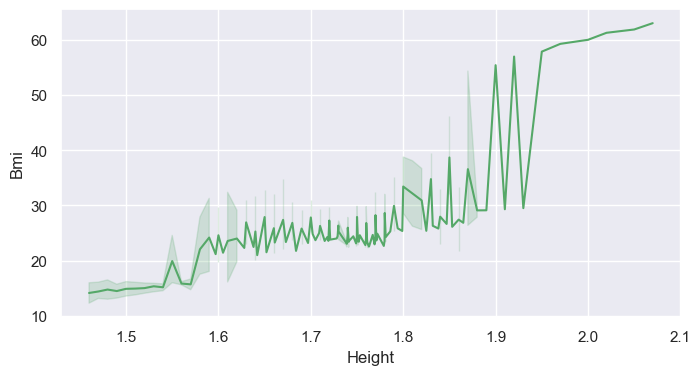

In [17]:
sns.set(rc={'figure.figsize':(8,4)})
sns.lineplot(x='Height',y='Bmi',data=data,color='g')
plt.show()

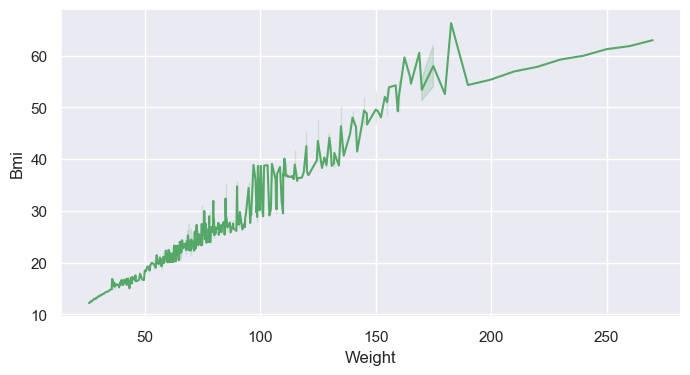

In [18]:
sns.set(rc={'figure.figsize':(8,4)})
sns.lineplot(x='Weight',y='Bmi',data=data,color='g')
plt.show()

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


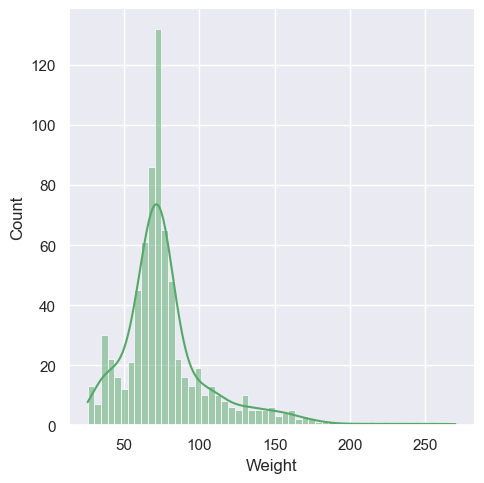

In [19]:
sns.set(rc={'figure.figsize':(20,10)})
sns.displot(data,x='Weight',kde=True,color='g')
plt.show()

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


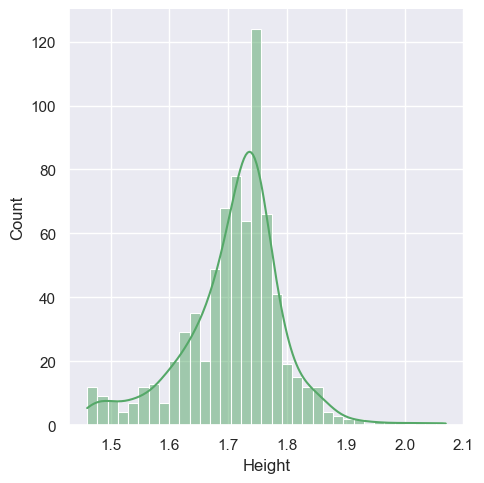

In [20]:
sns.set(rc={'figure.figsize':(20,10)})
sns.displot(data,x='Height',kde=True,color='g')
plt.show()

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


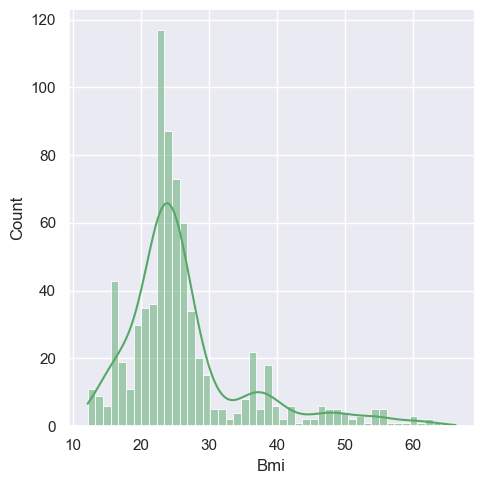

In [21]:
sns.set(rc={'figure.figsize':(20,10)})
sns.displot(data,x='Bmi',kde=True,color='g')
plt.show()

## Correlation Heatmap Of Features

In [22]:
corr=data.iloc[:,0:4].corr()

<Axes: >

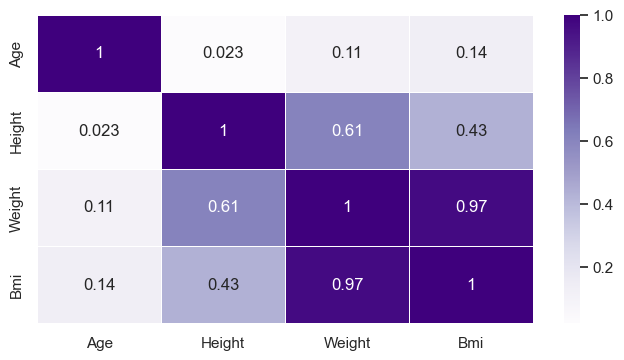

In [23]:
# heatmap
plt.figure(figsize=(8,4))
sns.heatmap(corr, annot=True,linewidths=.5, cmap="Purples")

# Modelling

## Splliting the dataset as train and test set

In [24]:
def Split(X,Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
    return X_train,X_test,Y_train,Y_test

## Prediction Using KNN Classifier

In [25]:
x=data.iloc[:,0:4].values
y=data['BmiClass'].values

In [26]:
# to find which value shows the lowest mean error
def KNN(X,Y):
    error_rate = []
    X_train,X_test,y_train,y_test=Split(X,Y)
    for i in range(1,62):
        knn = KNeighborsClassifier(n_neighbors=i)             
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
    knn = KNeighborsClassifier(n_neighbors=9)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return error_rate,confusion_matrix(y_test, y_pred),classification_report(y_test, y_pred),accuracy_score(y_test, y_pred)

In [27]:
Knn=KNN(x,y)

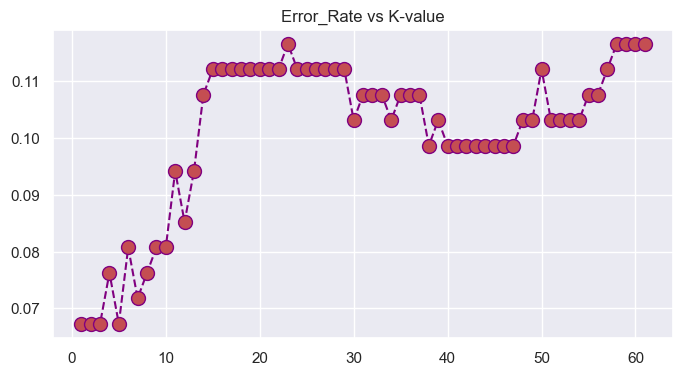

In [29]:
plt.figure(figsize=(8,4))
plt.plot(range(1,62), Knn[0], color='purple', linestyle="--",
         marker='o', markersize=10, markerfacecolor='r')
plt.title('Error_Rate vs K-value')
plt.show()

In [29]:
Knn[1]

array([[101,   0,   0,   0,   0,   0],
       [  0,   1,   2,   0,   3,   0],
       [  0,   0,  10,   3,   0,   0],
       [  0,   0,   2,  17,   0,   0],
       [  8,   0,   0,   0,  49,   0],
       [  0,   0,   0,   0,   0,  27]], dtype=int64)

In [30]:
Knn[2]

'               precision    recall  f1-score   support\n\nNormal Weight       0.93      1.00      0.96       101\nObese Class 1       1.00      0.17      0.29         6\nObese Class 2       0.71      0.77      0.74        13\nObese Class 3       0.85      0.89      0.87        19\n   Overweight       0.94      0.86      0.90        57\n  Underweight       1.00      1.00      1.00        27\n\n     accuracy                           0.92       223\n    macro avg       0.91      0.78      0.79       223\n weighted avg       0.92      0.92      0.91       223\n'

In [31]:
Knn[3]

0.9192825112107623

## Linear Regreession Model

In [32]:
x=data[['Bmi']]
y=data[['Height']]
def Linear_Reg(X,Y):
    X_train,X_test,y_train,y_test=Split(X,Y)
    LinReg=LinearRegression()
    l=LinReg.fit(X_train,y_train)
    y_pred=LinReg.predict(X_test)
    return  mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),r2_score(y_test,y_pred)

In [33]:
# mean_squared_error
Linear_Reg(x,y)[0]

0.006096558141684684

In [34]:
# mean_absolute_error
Linear_Reg(x,y)[1]

0.06067026576255947

In [35]:
# r2_score
Linear_Reg(x,y)[2]

0.2013455828819274

In [36]:
x=data[['Weight']]
y=data[['Bmi']]

In [37]:
# mean_squared_error
Linear_Reg(x,y)[0]

5.416325784207428

In [38]:
# mean_absolute_error
Linear_Reg(x,y)[1]

1.4607829385305107

In [39]:
# r2_score
Linear_Reg(x,y)[2]

0.929236939941767

## Multiple Linear Regreession Model

In [40]:
y=data[['Height','Weight','Age']]
x=data[['Bmi']]

In [41]:
# mean_squared_error
Linear_Reg(y,x)[0]

2.3585426416090725

In [42]:
# mean_absolute_error
Linear_Reg(y,x)[1]

0.7378353946495149

In [43]:
# r2_score
Linear_Reg(y,x)[2]

0.9691861787404451

## Logistic Regreession Model

In [44]:
#Because there is no features as 0 & 1 format....I create a new feature named Having_Thyroid ......Which I take as Randomly True or False

In [45]:
data1=data.copy()
random.seed(42)
random_text = [True,False,True]
random_text_column = [random.choice(random_text) for _ in range(len(data1))]
data1['Have_Thyroid'] = random_text_column
data1.head()

,Age,Height,Weight,Bmi,BmiClass,Have_Thyroid
0,61,1.85,109.30,31.935720,Obese Class 1,True
1,60,1.71,79.02,27.023700,Overweight,True
2,60,1.55,74.70,31.092612,Obese Class 1,True
3,60,1.46,35.90,16.841809,Underweight,True
4,60,1.58,97.10,38.896010,Obese Class 2,False


In [46]:
x=data1.drop(['Have_Thyroid','BmiClass'],axis=1)
y=data1['Have_Thyroid']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=21,stratify=y)
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)


In [47]:
print(data1['Have_Thyroid'].value_counts(normalize=True).round(2))

Have_Thyroid
True     0.68
False    0.32
Name: proportion, dtype: float64


In [48]:
model = sm.GLM(y, x, family=sm.families.Binomial())
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Have_Thyroid   No. Observations:                  741
Model:                            GLM   Df Residuals:                      737
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -461.76
Date:                Wed, 11 Oct 2023   Deviance:                       923.51
Time:                        21:04:30   Pearson chi2:                     741.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.001006
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0033      0.007      0.479      0.6

In [49]:
confusion_matrix=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
# Print the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: {confusion_matrix}')
print(f'Classification Report:\n{report}')

Accuracy: 0.6860986547085202
Confusion Matrix: [[  0  70]
 [  0 153]]
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        70
        True       0.69      1.00      0.81       153

    accuracy                           0.69       223
   macro avg       0.34      0.50      0.41       223
weighted avg       0.47      0.69      0.56       223



C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [50]:
X=data['Bmi']
Y=data['BmiClass']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = Split(X,Y)
X_train, X_test, y_train, y_test=np.array(X_train).reshape(-1,1),np.array(X_test).reshape(-1,1),np.array(y_train).reshape(-1,1),np.array(y_test).reshape(-1,1)
# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

In [51]:
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
# Print the results
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.9910313901345291
Classification Report:
               precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00       101
Obese Class 1       0.86      1.00      0.92         6
Obese Class 2       1.00      0.92      0.96        13
Obese Class 3       0.95      1.00      0.97        19
   Overweight       1.00      0.98      0.99        57
  Underweight       1.00      1.00      1.00        27

     accuracy                           0.99       223
    macro avg       0.97      0.98      0.97       223
 weighted avg       0.99      0.99      0.99       223



## Naive Bayes Classifier

In [52]:
predict=data.iloc[:,0:4]
target=data.iloc[:,4]
pred_train,pred_test,target_train,target_test=train_test_split(predict,target,test_size=0.3,random_state=123)
# pred_train, pred_test, target_train, target_test=np.array(pred_train).reshape(-1,1),np.array(pred_test).reshape(-1,1),np.array(target_train).reshape(-1,1),np.array(target_test).reshape(-1,1)
gnb=GaussianNB()
model=gnb.fit(pred_train,target_train)
prediction=model.predict(pred_test)
df=pd.DataFrame(prediction,target_test)

In [53]:
accuracy=accuracy_score(target_test,prediction)
report=classification_report(target_test,prediction)
# confusion_matrix=confusion_matrix(target_test,prediction)

In [54]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.9506726457399103


In [55]:
print(f'Classification Report:\n{report}')

Classification Report:
               precision    recall  f1-score   support

Normal Weight       0.96      0.96      0.96       110
Obese Class 1       0.67      1.00      0.80         6
Obese Class 2       1.00      0.93      0.97        15
Obese Class 3       1.00      1.00      1.00        17
   Overweight       0.94      0.89      0.91        53
  Underweight       0.96      1.00      0.98        22

     accuracy                           0.95       223
    macro avg       0.92      0.96      0.94       223
 weighted avg       0.95      0.95      0.95       223



## RandomForestRegressor

In [56]:
x=data['Age']
y=data['Bmi']
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=42)
rgr=RandomForestRegressor()
rgr.fit(np.array(train_x).reshape(-1,1),np.array(train_y).reshape(-1,1))
test_x=np.array(test_x).reshape(-1,1)
y_pred=rgr.predict(test_x)
mean_squared_error=mean_squared_error(test_y,y_pred)


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [57]:
mean_squared_error

89.09871431264033

## Random Forest Classifier

In [58]:
X=data['Bmi']
Y=data['BmiClass']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test=np.array(X_train).reshape(-1,1),np.array(X_test).reshape(-1,1),np.array(y_train).reshape(-1,1),np.array(y_test).reshape(-1,1)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)
df=pd.DataFrame(y_pred,y_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
# Print the results
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9932885906040269
Classification Report:
               precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00        59
Obese Class 1       1.00      1.00      1.00         3
Obese Class 2       1.00      0.89      0.94         9
Obese Class 3       0.93      1.00      0.96        13
   Overweight       1.00      1.00      1.00        45
  Underweight       1.00      1.00      1.00        20

     accuracy                           0.99       149
    macro avg       0.99      0.98      0.98       149
 weighted avg       0.99      0.99      0.99       149



## Support Vector Machine

In [59]:
from sklearn.svm import SVC
x1=data['Weight']
y1=data['BmiClass']
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.3)
svc = SVC()
svc.fit(np.array(xtrain).reshape(-1,1),np.array(ytrain).reshape(-1,1))
prediction1=svc.predict(np.array(xtest).reshape(-1,1))

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
report = classification_report(ytest, prediction1)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
print(f"classification_report: {report}")

classification_report:                precision    recall  f1-score   support

Normal Weight       0.84      0.96      0.90       101
Obese Class 1       0.00      0.00      0.00         9
Obese Class 2       0.67      0.63      0.65        19
Obese Class 3       0.91      0.91      0.91        23
   Overweight       0.65      0.64      0.64        44
  Underweight       1.00      0.89      0.94        27

     accuracy                           0.82       223
    macro avg       0.68      0.67      0.67       223
 weighted avg       0.78      0.82      0.80       223



In [62]:
accuracy = accuracy_score(np.array(ytest).reshape(-1,1),prediction1)
accuracy

0.8161434977578476

In [63]:
# (89+1+8+27)/(89+2+3+5+2+3+13+2+3+18+1+2+41+8+2+2+27)

In [64]:
confus= pd.DataFrame(prediction1,ytest)

In [65]:
confus

,0
BmiClass,
Underweight,Underweight
Normal Weight,Normal Weight
Overweight,Normal Weight
Normal Weight,Normal Weight
Obese Class 2,Overweight
...,...
Overweight,Normal Weight
Obese Class 3,Obese Class 3
Normal Weight,Normal Weight
